<a href="https://colab.research.google.com/github/tiagrmsoares/deploy-web/blob/master/Machine_Learning_Classification_with_Python_for_Direct_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Classification with Python for Direct Marketing

# Import
Primeiro vamos importar o banco de dados:

In [45]:
import pandas as pd
df = pd.read_csv('bank.csv', delimiter = ';', decimal = ',')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


Com a consulta df.isnull (). Sum (), garantimos que não haja valores ausentes no conjunto de dados.

In [46]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


Em seguida, transformaremos os rótulos não numéricos das variáveis ​​categóricas em numéricos e os converteremos em números inteiros, utilizando a biblioteca 'sklearn'. Fazemos assim:

In [0]:
from sklearn import preprocessing

num = preprocessing.LabelEncoder()

num.fit(['admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services',
         'student','technician','unemployed','unknown'])
df['job'] = num.transform(df['job']).astype('int')


num.fit(['divorced','married','single','unknown'])
df['marital'] = num.transform(df['marital']).astype('int')

num.fit(['basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course',
         'university.degree','unknown'])
df['education'] = num.transform(df['education']).astype('int')

num.fit(['no','yes','unknown'])
df['housing'] = num.transform(df['housing']).astype('int')

num.fit(['no','yes','unknown'])
df['loan'] = num.transform(df['loan']).astype('int')

num.fit(['failure','nonexistent','success'])
df['poutcome'] = num.transform(df['poutcome']).astype('int')

num.fit(['yes','no'])
df['y'] = num.transform(df['y']).astype('int')




Neste exemplo, foi necessario fazer a limpeza de algumas colunas irrelevantes, como 'contact', ' month ',' day_of_week ',' duration ',' campaign ',' pdays ',' previous 'e' poutcome '(essas colunas descrevem uma chamada telefônica que já aconteceu, portanto, não devem ser usadas em nosso modelo preditivo).

In [0]:
df.drop(columns=['contact','month','day_of_week','duration','campaign','pdays','previous','poutcome'], inplace=True)

In [51]:
df

,age,job,marital,education,default,housing,loan,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,no,0,0,1.1,93.994,-36.4,4.857,5191,0
1,57,7,1,3,unknown,0,0,1.1,93.994,-36.4,4.857,5191,0
2,37,7,1,3,no,2,0,1.1,93.994,-36.4,4.857,5191,0
3,40,0,1,1,no,0,0,1.1,93.994,-36.4,4.857,5191,0
4,56,7,1,3,no,0,2,1.1,93.994,-36.4,4.857,5191,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,no,2,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,no,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,no,2,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,no,0,0,-1.1,94.767,-50.8,1.028,4963.6,1


Executamos uma consulta 'df.dtypes' apenas para garantir que os rótulos tenham se transformado em números inteiros.

In [52]:
df.dtypes

age                int64
job                int64
marital            int64
education          int64
default           object
housing            int64
loan               int64
emp.var.rate      object
cons.price.idx    object
cons.conf.idx     object
euribor3m         object
nr.employed       object
y                  int64
dtype: object

Em seguida, aplicamos o 'StandardScaler' da caixa de ferramentas 'sklearn.preprocessing' para padronizar os valores numéricos dos outros recursos que esperamos encontrar no modelo. O método padroniza os recursos removendo a média e o dimensionamento para a variação da unidade:

In [0]:
from sklearn.preprocessing import StandardScaler
sclaer = StandardScaler()

df['cons.price.idx'] = sclaer.fit_transform(df[['cons.price.idx']]).reshape(-1,1)
df['cons.conf.idx'] = sclaer.fit_transform(df[['cons.conf.idx']]).reshape(-1,1)
df['euribor3m'] = sclaer.fit_transform(df[['euribor3m']]).reshape(-1,1)


Vamos agora classificar os recursos do conjunto de dados com o método de eliminação de recurso recursivo (RFE) e o algoritmo Random Forest Classifier como seu estimador:

In [59]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

X = np.asarray(df[['age', 'job', 'marital', 'education', 'housing', 'loan', 'emp.var.rate',
                  'cons.price.idx','cons.conf.idx','euribor3m']])

y = np.asarray(df['y'])
rfc = RandomForestClassifier(n_estimators=40)
rfe = RFE(rfc, 6)
rfe_fit = rfe.fit(X, y)

print('Num features: %s' %  (rfe_fit.n_features_))
print('Selected Features: %s' % (rfe_fit.support_))
print('Feature Ranking: %s' % (rfe_fit.ranking_))

Num features: 6
Selected Features: [ True  True False  True False False  True False  True  True]
Feature Ranking: [1 1 3 1 2 5 1 4 1 1]


Vamos verificar quantos valores para cara classificação da variável resposta y:

In [65]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64


Desequilíbrio de classe é o problema que geralmente acompanha casos de classificação. Após executar a consulta df ['y']. Value_counts (), vemos que as duas classes da variável 'y' não são representadas igualmente em nosso conjunto de dados. Após a limpeza dos dados, existem 36584 registros pertencentes à classe '0' e apenas 4640 registros da classe '1' na variável de destino 'y'. Antes de dividir os dados nas amostras de treinamento e teste, devemos pensar em superamostragem ou subamostragem dos dados.

# SMOTE

Smote – Consiste em gerar dados sintéticos (não duplicados) da classe minoritária a partir de vizinhos.
Ele calcula quais são os vizinhos mais próximos e as características desses vizinhos para criar novos dados. Se o número de dados gerados for muito grande podemos ter um overfiting.

Para reamostrar os dados, vamos aplicar o método SMOTE para a sobreamostragem na caixa de ferramentas imblearn.over_sampling (para esta etapa, talvez seja necessário instalar o pacote imblearn com Pip ou Conda primeiro):

In [69]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(ratio='auto', kind='regular')
X_sampled, y_sampled = sm.fit_sample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)



É tão simples quanto isso. Agora, os dados estão em equilíbrio com as entradas 36548 em cada classe:

In [70]:
Sampled_no = len(y_sampled[y_sampled==0])
Sampled_yes = len(y_sampled[y_sampled==1])
print([Sampled_no],[Sampled_yes])

[36548] [36548]


# Construindo um modelo preditivo

Agora que os dados foram preparados, estamos prontos para treinar nosso modelo e fazer previsões. Vamos primeiro dividir os dados nos conjuntos de treinamento e teste:

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.3, random_state=0)


Vamos tentar quatro algoritmos de classificação, ou seja, regressão logística, máquina de vetores de suporte, árvores de decisão e floresta aleatória e depois calcularemos suas pontuações F1 usando uma função de pontuação definida pelo usuário para escolher o classificador com a pontuação mais alta:

In [72]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression(C=1, solver='lbfgs')
clf = SVC(kernel ='rbf', gamma = 'auto')
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
rfc = RandomForestClassifier(n_estimators=40)

def scorer(i,j,k,l):
  for every in (i,j,k,l):
    every.fit(X_train,y_train)
    print(every.__class__.__name__, 'F1 score =', f1_score(y_test,every.predict(X_test)))
scorer (lr,clf,dtree,rfc)

LogisticRegression F1 score = 0.7144288577154309
SVC F1 score = 0.7474278128111518
DecisionTreeClassifier F1 score = 0.704084949615343
RandomForestClassifier F1 score = 0.9238555535290899



A pontuação F1 é a média ponderada da precisão e recuperação. 
Agora, imprimamos um relatório de classificação completo com a precisão e recuperação do algoritmo Random Forest, que demonstrou a maior pontuação F1:

In [73]:
from sklearn.metrics import classification_report
yhat = rfc.predict(X_test)
print(classification_report(y_test,yhat))


              precision    recall  f1-score   support

           0       0.91      0.93      0.92     10857
           1       0.93      0.92      0.92     11072

    accuracy                           0.92     21929
   macro avg       0.92      0.92      0.92     21929
weighted avg       0.92      0.92      0.92     21929



Finalmente, podemos visualizar o resultado com uma matriz de confusão:

In [0]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion Matrix',
                          cmap = plt.cm.Blues):
  plt.imshow(cm, interpolation = 'nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j], fmt),
             horizontalalignment = 'center',
             color = 'white' if cm[i,j] > thresh else 'black')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

  

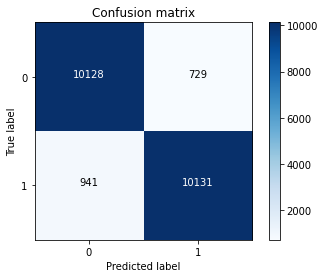

In [80]:
plot_confusion_matrix(confusion_matrix(y_test,yhat), classes = ['0','1'], normalize=False, title='Confusion matrix')